In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
url='https://drive.google.com/file/d/1ikU96dZIboF3S0dPnoYIialhkxT-wcBA/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()

,Unnamed: 0,Dia,GDCD,Hoa,Li,Ma_mon_ngoai_ngu,Ngoai_ngu,Sinh,Su,Toan,Van,sbd
0,0,7.75,8.75,NaN,NaN,N1,7.6,NaN,8.25,8.2,8.00,24008611
1,1,NaN,NaN,4.5,8.25,N1,8.0,6.0,NaN,8.6,6.17,51000032
2,2,4.25,5.75,NaN,NaN,NaN,NaN,NaN,4.00,5.2,4.75,51000005
3,3,4.75,5.00,NaN,NaN,NaN,NaN,NaN,2.25,4.4,4.50,51000021
4,4,8.25,7.50,NaN,NaN,N1,4.4,NaN,7.75,5.8,6.00,51000013


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811851 entries, 0 to 811850
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        811851 non-null  int64  
 1   Dia               535897 non-null  float64
 2   GDCD              470905 non-null  float64
 3   Hoa               295544 non-null  float64
 4   Li                292166 non-null  float64
 5   Ma_mon_ngoai_ngu  728513 non-null  object 
 6   Ngoai_ngu         728513 non-null  float64
 7   Sinh              291199 non-null  float64
 8   Su                542729 non-null  float64
 9   Toan              807762 non-null  float64
 10  Van               799208 non-null  float64
 11  sbd               811851 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 74.3+ MB


Tổng cộng có 12 column. và 811851 entries.
/column xuất hiện trong bảng có  số lượng các giá trị not null tương ứng và loại giá trị tương ứng



In [ ]:
df.describe()

,Unnamed: 0,Dia,GDCD,Hoa,Li,Ngoai_ngu,Sinh,Su,Toan,Van,sbd
count,811851.000000,535897.000000,470905.000000,295544.000000,292166.000000,728513.000000,291199.000000,542729.000000,807762.000000,799208.000000,8.118510e+05
mean,405925.000000,5.988069,7.353802,5.342898,5.563926,4.240692,4.665719,4.293683,5.573748,5.442390,3.040246e+07
std,234361.341032,1.232252,1.270562,1.594621,1.619208,1.750507,1.247124,1.439408,1.758361,1.353822,1.789921e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000029e+06
25%,202962.500000,5.250000,6.500000,4.250000,4.500000,3.000000,3.750000,3.250000,4.200000,4.670000,1.700340e+07
50%,405925.000000,6.000000,7.500000,5.500000,5.750000,3.800000,4.500000,4.000000,5.600000,5.500000,2.902832e+07
75%,608887.500000,6.750000,8.250000,6.500000,6.750000,5.200000,5.250000,5.000000,7.000000,6.500000,4.600444e+07
max,811850.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.500000,6.400574e+07


count:Số entry các cột tương ứng
/mean: giá trị trung bình của các cột
/std: giá trị biến thiên
/min: giá trị nhỏ nhất
/25%: giá trị chiếm 25% trong cột 
/50%: giá trị chiếm 50% trong cột 75%: giá trị chiếm 
/75% trong cột 
/max: giá trị lớn nhất trong cột
/Ta thấy std có giá trị thấp nên dữ liệu phân bổ khá đồng đều

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Sinh                520652
Li                  519685
Hoa                 516307
GDCD                340946
Dia                 275954
Su                  269122
Ngoai_ngu            83338
Ma_mon_ngoai_ngu     83338
Van                  12643
Toan                  4089
sbd                      0
Unnamed: 0               0
dtype: int64

Dữ liệu có bị missing tại các cột toan, van , ma mon ngoai ngu, su, ngoai ngu, dia, GDCD, Hoa, Li, Sinh(chiếm nhiều nhất) tương ứng với số lượng các entry có giá trị null
SBD không tồn tại entry null nào
Để xử lý các cột bị missing dữ liệu ta có thể thêm bằng tay hay thêm các giá trị trung bình(hay giá trị tần suất xuất hiện nhiều nhất) vào các ô giá trị null. Hoặc xóa dòng hay cột có giá trị null cao.

In [3]:
mode = df['Sinh'].mode()
df_sinh=df[df['Sinh'].isnull()].fillna(mode, inplace=True)
mode = df['Li'].mode()
df_li=df[df['Li'].isnull()].fillna(mode, inplace=True)
mode = df['Hoa'].mode()
df_hoa=df[df['Hoa'].isnull()].fillna(mode, inplace=True)
mode = df['GDCD'].mode()
df_gdcd=df[df['GDCD'].isnull()].fillna(mode, inplace=True)
mode = df['Dia'].mode()
df_dia=df[df['Dia'].isnull()].fillna(mode, inplace=True)
mode = df['Su'].mode()
df_su=df[df['Su'].isnull()].fillna(mode, inplace=True)
mode = df['Ma_mon_ngoai_ngu'].mode()
df_mamonNN=df[df['Ma_mon_ngoai_ngu'].isnull()].fillna(mode, inplace=True)

Thêm vào các ô có giá trị null bằng giá trị tần suất xuất hiện nhiều nhất các cột Sinh,li, hoa, GDCD, Dia, Su, Ma_mon_ngoai_ngu

In [7]:
df.fillna(method='bfill')
df.fillna(method="ffill")

,Unnamed: 0,Dia,GDCD,Hoa,Li,Ma_mon_ngoai_ngu,Ngoai_ngu,Sinh,Su,Toan,Van,sbd
0,0,7.75,8.75,NaN,NaN,N1,7.6,NaN,8.25,8.2,8.00,24008611
1,1,7.75,8.75,4.50,8.25,N1,8.0,6.00,8.25,8.6,6.17,51000032
2,2,4.25,5.75,4.50,8.25,N1,8.0,6.00,4.00,5.2,4.75,51000005
3,3,4.75,5.00,4.50,8.25,N1,8.0,6.00,2.25,4.4,4.50,51000021
4,4,8.25,7.50,4.50,8.25,N1,4.4,6.00,7.75,5.8,6.00,51000013
...,...,...,...,...,...,...,...,...,...,...,...,...
811846,811846,5.75,8.50,3.25,4.25,N1,3.4,5.50,4.50,4.4,4.75,26019104
811847,811847,5.75,8.50,4.50,3.75,N1,4.4,4.00,4.50,5.2,6.25,26019102
811848,811848,5.50,8.00,4.50,3.75,N1,2.8,4.00,5.50,2.8,5.00,26019099
811849,811849,6.75,8.50,4.50,3.75,N1,4.0,4.00,3.50,6.2,7.25,26019101


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde6cce35d0>]],
      dtype=object)

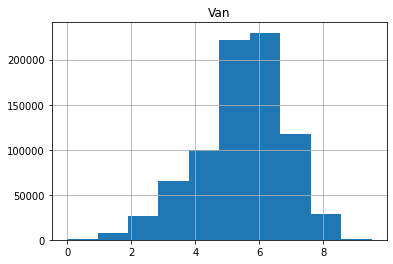

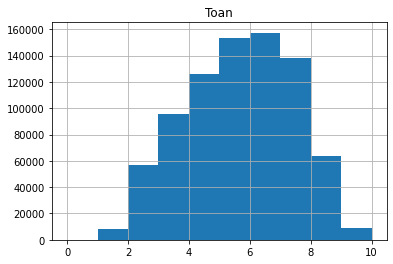

In [ ]:
df.hist(column='Van')
df.hist(column='Toan')

Điểm văn và toán phân bố khá đồng đều, số người đạt điểm 6-7 toán chiếm tỉ lệ cao nhất, đối với văn điểm từ 5.5 đến 6.5 có số lượng người đạt cao nhất. Đồ thị biểu diễn điểm văn và toán hướng về phía bên phải và giá trị mean > median

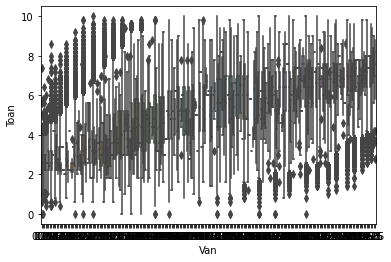

In [ ]:
sns.boxplot(x='Van',y='Toan',data=df)
plt.xticks(fontsize =10)
plt.yticks(fontsize =10)
plt.savefig('Van_Toan.png')

In [ ]:
Điểm văn và toán có bị outlier.